In [2]:
using CairoMakie
using FourierFlows

In [122]:
function power_law(k, cutoff, N, n)
    if abs(k) < cutoff
        return abs(k).^N
    else
        return cutoff^(-N) * abs(k).^(n)
    end
end

function V(q, ω)
    return power_law.(q, 10.0, 1, -6) .* power_law.(ω, 10.0, 1, -6)
end

function V_synth(q, ω)
    return 2 ./ (ω.^2 .+ 1)
end

V_synth (generic function with 1 method)

In [123]:
q = 0:0.02:1000
σ = -q * 3;

In [124]:
αs = exp.(log(0.01):0.5:log(50.0))
results = zeros(length(αs))
i = 1
for α=αs
    results[i] = α^4 * sum(V(q, - 3 * α * q))
    i += 1
end

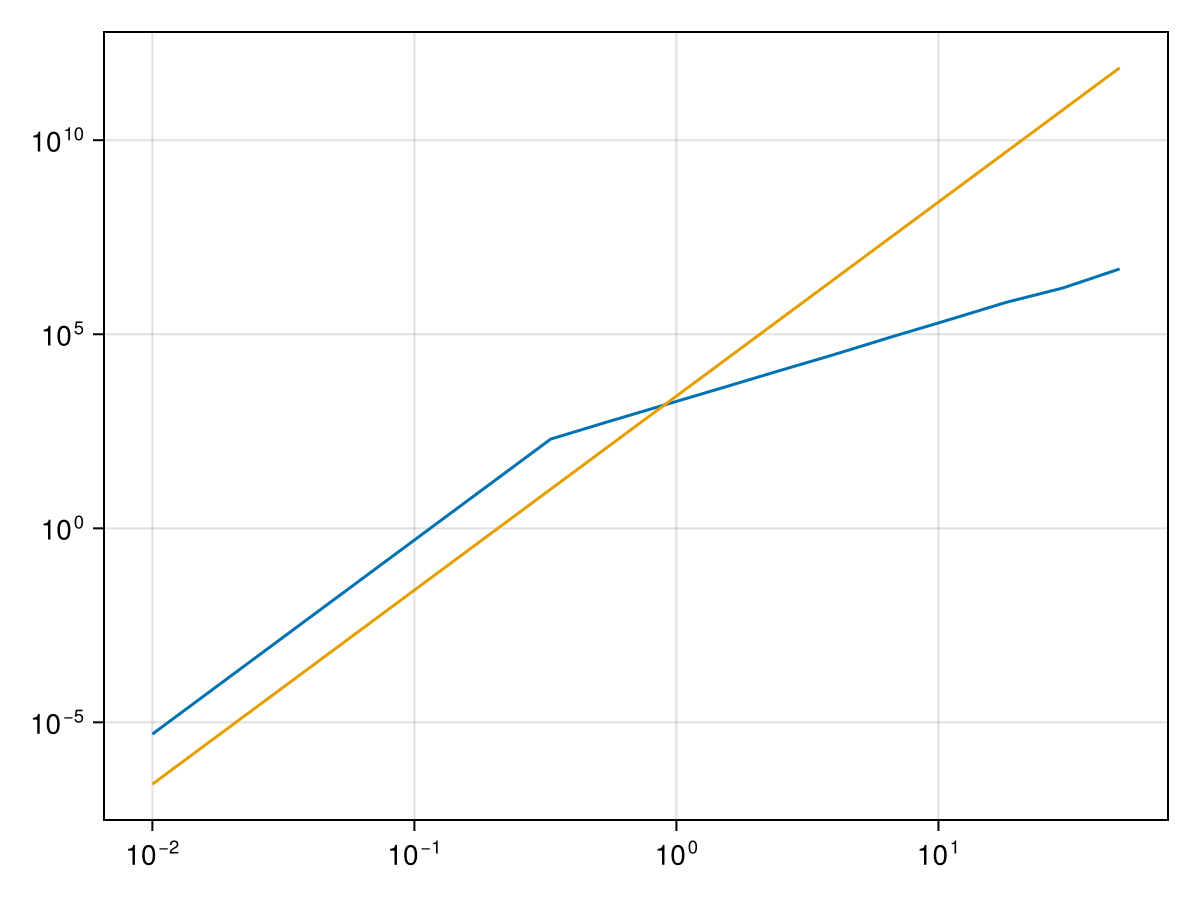

In [125]:
fig = Figure()
ax = Axis(fig[1,1]; xscale=log10, yscale=log10)
lines!(αs, results)
lines!(αs, results[10] * (αs/αs[10]).^(5))
#lines!(αs, results[10] * (αs/αs[10]).^(3))

fig